<a href="https://colab.research.google.com/github/sundarp17/sundar_info5731_fall2020/blob/master/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [62]:
#Write your code here.

import pandas as pd

df = pd.read_csv(r'/content/Data_Microsoft_EmployeeReview.csv')

df.head()


,company,location,Dates,Employee Type,Job Title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,microsoft,"Redmond, WA",14-12-2011,Current Employee,Anonymous Employee,Varies by Team - Old one: Good place to cruise...,I'd done a review based on previous team befor...,Based on new team - Cons: -Lots of work making...,"Clearly, Microsoft is beyond its heydays. I do...",4,3.5,none,4,4.5,4,1,https://www.glassdoor.com/Reviews/Microsoft-Re...
1,microsoft,"Redmond, WA",09-12-2011,Former Employee,Business Administrator,If you get the wrong team . . . .,If you are on right team - it is the best plac...,If you get the wrong team with the wrong manag...,none,2,2,none,2,3.5,2,2,https://www.glassdoor.com/Reviews/Microsoft-Re...
2,microsoft,"New York, NY",19-12-2011,Current Employee,Anonymous Employee,Great,Great work life balance for working parents,Senior management strategy around products and...,none,4,4.5,none,4,4.5,2,0,https://www.glassdoor.com/Reviews/Microsoft-Re...
3,microsoft,"Irving, TX",03-12-2011,Former Employee,Anonymous Employee,Initially good but as leadership has evolved i...,Pay - Okay Benefits - great but changing in 20...,As the leadership that made MS successful has ...,Study the company's history. Respect your peop...,2,3,none,3,3.5,1,4,https://www.glassdoor.com/Reviews/Microsoft-Re...
4,microsoft,"Redmond, WA",04-12-2011,Current Employee,Staffing Consultant,Good place to grow,Strong benefits and job stability,"Poor work/life balance Some great managers, bu...",none,2,1,none,2,4.5,2,1,https://www.glassdoor.com/Reviews/Microsoft-Re...


In [2]:
len(df)

4500

In [3]:
df.columns

Index(['company', 'location', 'Dates', 'Employee Type', 'Job Title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

In [4]:
df.isnull().sum()

company                        0
location                       0
Dates                          0
Employee Type                  0
Job Title                      0
summary                        9
pros                           0
cons                           0
advice-to-mgmt                27
overall-ratings                0
work-balance-stars             0
culture-values-stars           0
carrer-opportunities-stars     0
comp-benefit-stars             0
senior-mangemnet-stars         0
helpful-count                  0
link                           0
dtype: int64

I am performing the 3 algorithms on the pros column.

In [46]:
df['pros'].head()

0    I'd done a review based on previous team befor...
1    If you are on right team - it is the best plac...
2          Great work life balance for working parents
3    Pay - Okay Benefits - great but changing in 20...
4                    Strong benefits and job stability
Name: pros, dtype: object

In [63]:
#data cleaning
import re
#removing punctutations
df['pros']=df['pros'].map(lambda x: re.sub('[?|!|\'|"|#]', '', x))
#lower
df['pros']=df['pros'].map(lambda x: x.lower())

df['pros'].head()

0    id done a review based on previous team before...
1    if you are on right team - it is the best plac...
2          great work life balance for working parents
3    pay - okay benefits - great but changing in 20...
4                    strong benefits and job stability
Name: pros, dtype: object

In [64]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
from textblob import Word
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')

df['pros']=df['pros'].apply(lambda x:" ".join(x for x in x.split() if x not in words))
df['pros']=df['pros'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
df['pros'].head()

0    id done review based previous team id given co...
1    right team - best place work management fantas...
2               great work life balance working parent
3    pay - okay benefit - great changing 2012. grea...
4                         strong benefit job stability
Name: pros, dtype: object

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer()
tfidf_vec = tf_vect.fit_transform(df['pros'].values)
tfidf_vec.shape

(4500, 5525)

In [66]:
names= tf_vect.get_feature_names()

In [67]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++', n_jobs = -1,max_iter=10000, random_state=42)
model.fit(tfidf_vec)
from collections import Counter

Counter(model.labels_)

Counter({0: 165, 1: 452, 2: 596, 3: 313, 4: 2439, 5: 535})

In [68]:
topn_features = 8
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(6):
    key_features = [names[i] for i in centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*100)

CLUSTER #1
Key Features: ['nice', 'good', 'environment', 'work', 'people', 'place', 'office', 'salary']
----------------------------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['people', 'smart', 'lot', 'work', 'great', 'benefits', 'benefit', 'good']
----------------------------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['good', 'work', 'benefit', 'salary', 'environment', 'company', 'culture', 'pay']
----------------------------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['balance', 'life', 'work', 'good', 'great', 'culture', 'benefit', 'people']
----------------------------------------------------------------------------------------------------
CLUSTER #5
Key Features: ['work', 'company', 'microsoft', 'benefit', 'opportunity', 'lot', 'best', 'great']
---------------------------------------------------------------------------

In [69]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vec, model.labels_, metric='euclidean')
silhouette_score

0.010254804297169465

In [76]:
#dbscan
pros_msft=[]
for i in df['pros']:
  pros_msft.append(i.split())
import gensim
w2v_model=gensim.models.Word2Vec(pros_msft, size=100, workers=4)

In [77]:
pro_vectors = []
for i in pros_msft:
    pro_vec = np.zeros(100)
    count_words = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            pro_vec += vec
            count_words += 1
        except:
            pass
    pro_vec /= count_words
    pro_vectors.append(pro_vec)
    
pro_vectors = np.array(pro_vectors)
pro_vectors = np.nan_to_num(pro_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [78]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [80]:
pro_vectors.shape

(4500, 100)

In [89]:
twohundrethneigh = []
for val in pro_vectors[:500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, pro_vectors[:500]))
twohundrethneigh.sort()


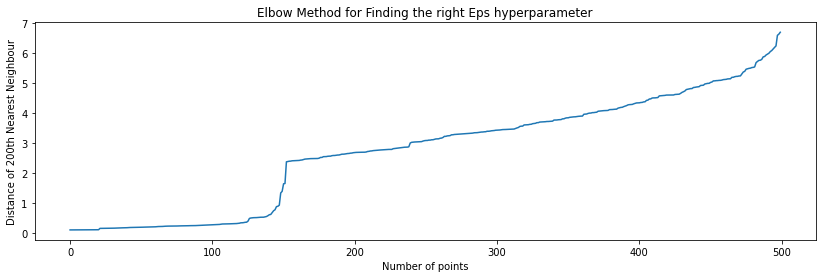

In [90]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [93]:
model = DBSCAN(eps = 3, min_samples = minPts, n_jobs=-1)
model.fit(pro_vectors)
df['DBSCAN Cluster Labels'] = dbscan.labels_
# Finding the number of reviews in each cluster
print(df.groupby(['DBSCAN Cluster Labels'])['pros'].count())

DBSCAN Cluster Labels
-1      4183
 0         2
 1         5
 2         2
 3         3
        ... 
 137       2
 138       2
 139       2
 140       2
 141       2
Name: pros, Length: 143, dtype: int64


Hierarchical

In [36]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

def ward_hierarchical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix



In [40]:
import matplotlib.pyplot as plt

def plot_hierarchical_clusters(linkage_matrix,data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    titles = data['pros'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [41]:
linkage_matrix = ward_hierarchical_clustering(tfidf_vec)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


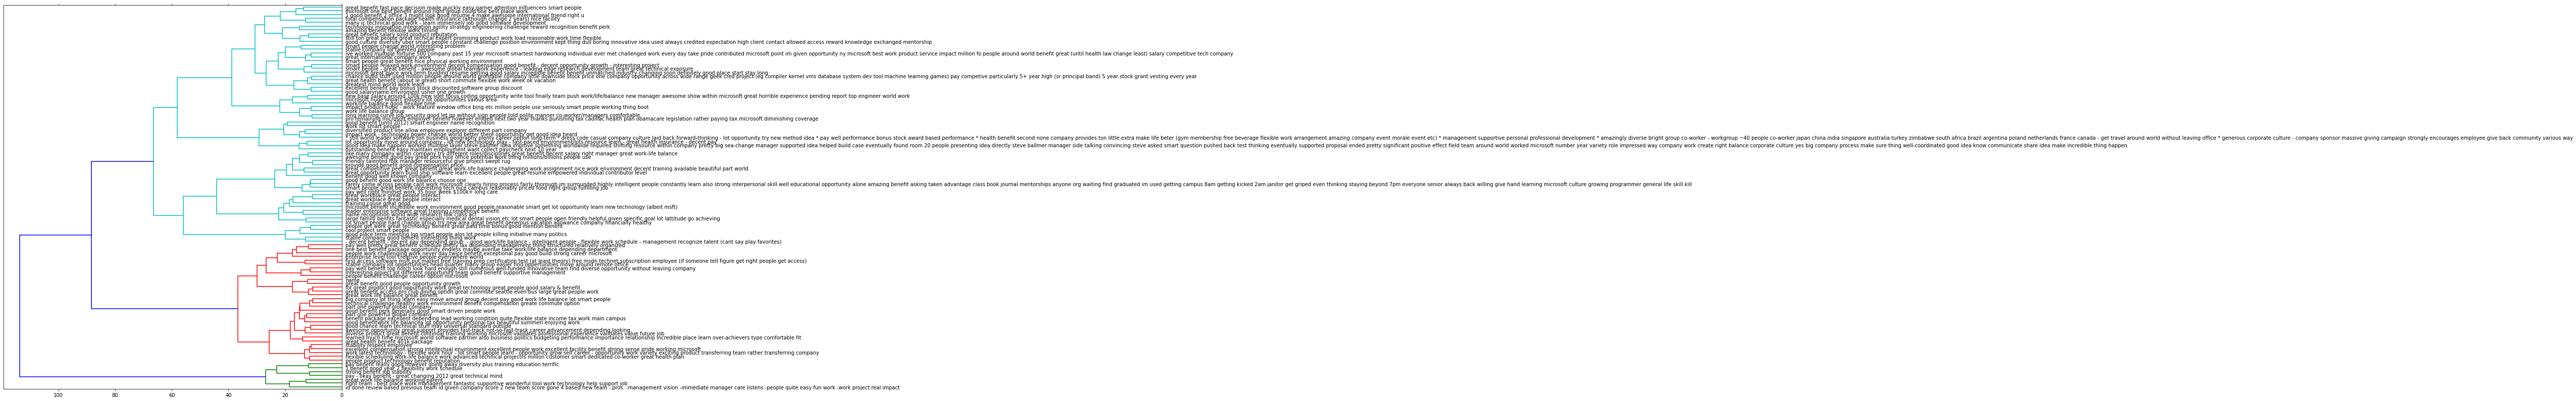

In [42]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           data=df,
                           figure_size=(12, 14))

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.

Hierarchical clustering is used when we want to find the clusters inside the clusters. It is best when we want to find the
hidden structures inside the data.DBSCAN is based on density. It will find unknown number of clusters of similar density.
K-means considers every point in the dataset and uses that information to evolve the clustering over a series of iterations.
I think DBSCAN will not work properly when we have a large data set. The optimal number of clusters is nearly to 1 when i passed
more than 1500 values in pro_vectors(see the code for dbscan). K-means is really good for large data sets as it is efficient.


